# ML model error representation

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
df = pd.read_excel(r'data\dataframe3.xlsx') #dataframe50
df.head()

,Unnamed: 0,Sensor,Date,Index,Model,Accuracy,Water precision,Water f1-score,Water test pixels,Oil precision,Oil f1-score,Oil test pixels
0,0,AVIRIS,1,NDOI,KNN,0.979004,0.979853,0.987373,2004,0.974619,0.937729,425
1,1,AVIRIS,1,NDOI,Decision tree,0.976534,0.980741,0.985853,2004,0.955446,0.931242,425
2,2,AVIRIS,1,NDOI,Random Forest,0.974063,0.982596,0.984309,2004,0.933014,0.925267,425
3,3,AVIRIS,1,NDOI,Ada Boost,0.979415,0.980334,0.987618,2004,0.974684,0.939024,425
4,4,AVIRIS,1,RAI,KNN,0.978592,0.981737,0.987097,2004,0.962779,0.937198,425


In [76]:
Av_1 = df[(df.Sensor == "AVIRIS") & (df.Date == 1)]
Av_2 = df[(df.Sensor == "AVIRIS") & (df.Date == 2)]
Hi_1 = df[(df.Sensor == "HICO") & (df.Date == 1)]
Hi_2 = df[(df.Sensor == "HICO") & (df.Date == 2)]
Me_1 = df[(df.Sensor == "MERIS") & (df.Date == 1)]
Me_2 = df[(df.Sensor == "MERIS") & (df.Date == 2)]

images = [Av_1, Av_2, Hi_1, Hi_2, Me_1, Me_2]
images_name = ["Av_1", "Av_2", "Hi_1", "Hi_2", "Me_1", "Me_2"]

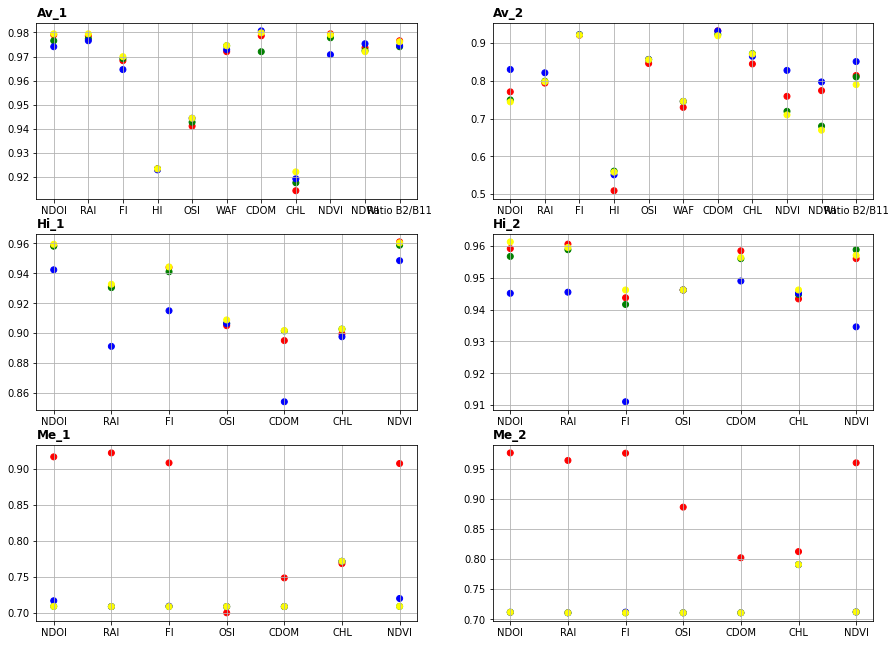

In [77]:
fig = plt.figure(figsize=(15,11))
col = {'KNN':'red', 'Decision tree':'green', 'Random Forest':'blue', 'Ada Boost':'yellow'}

for i in range(0,len(images)):
    ax = fig.add_subplot(3,2,i+1)
    title = images_name[i]
    plt.grid()
    plt.title(title, fontweight='bold', fontsize=12, loc='left')
    plt.scatter(images[i]['Index'].tolist(), images[i]['Accuracy'].tolist(), marker='o', color = images[i].Model.map(col))


In [69]:
#plt.plot(x_val, y_val, marker='o', linestyle='--')
#Av_1.plot.line(x = "Index", y = 'Accuracy', color = Av_1.Model.map(col))

<AxesSubplot:title={'center':'Oil f1-score'}, xlabel='Index'>

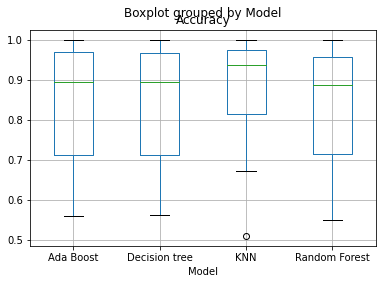

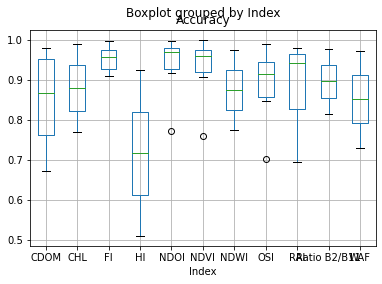

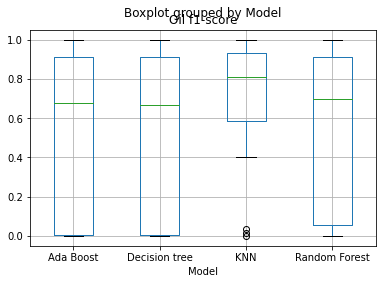

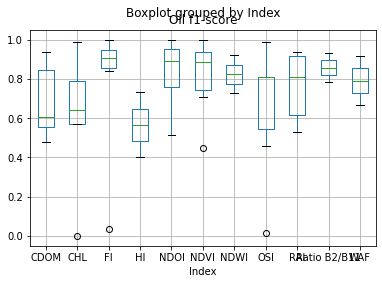

In [70]:
df.boxplot(column="Accuracy", by="Model")
df[df.Model == "KNN"].boxplot(column="Accuracy", by="Index")

df.boxplot(column="Oil f1-score", by="Model")
df[df.Model == "KNN"].boxplot(column="Oil f1-score", by="Index")


In [71]:
"""
Av_1.boxplot(column="Accuracy", by="Index")
Av_1.boxplot(column=["Oil f1-score","Water f1-score"], by="Index")
Av_2.boxplot(column="Accuracy", by="Index")
Hi_1.boxplot(column="Accuracy", by="Index")
Hi_2.boxplot(column="Accuracy", by="Index")
Me_1.boxplot(column="Accuracy", by="Index")
Me_2.boxplot(column="Accuracy", by="Index")"""

'\nAv_1.boxplot(column="Accuracy", by="Index")\nAv_1.boxplot(column=["Oil f1-score","Water f1-score"], by="Index")\nAv_2.boxplot(column="Accuracy", by="Index")\nHi_1.boxplot(column="Accuracy", by="Index")\nHi_2.boxplot(column="Accuracy", by="Index")\nMe_1.boxplot(column="Accuracy", by="Index")\nMe_2.boxplot(column="Accuracy", by="Index")'

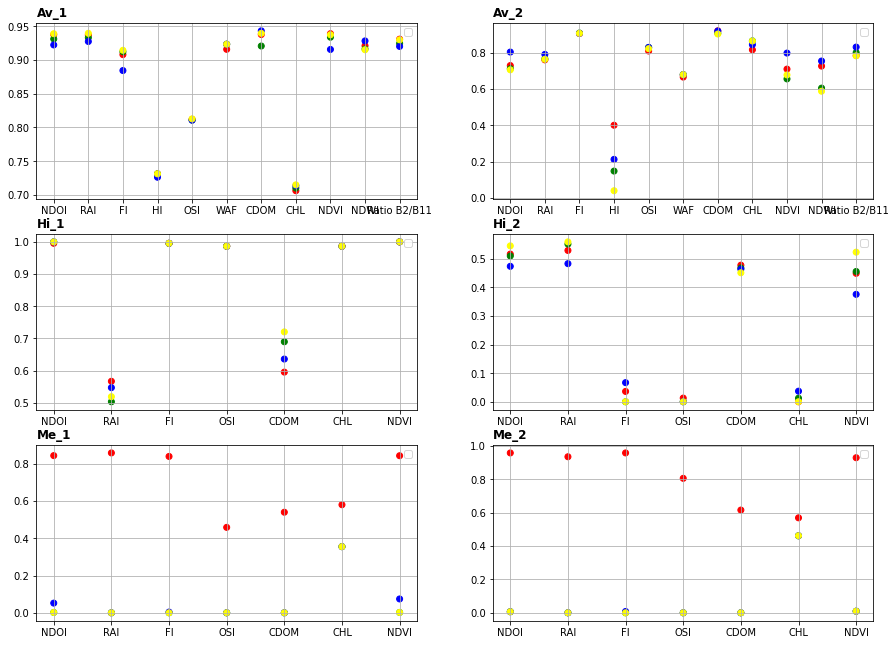

In [72]:
fig = plt.figure(figsize=(15,11))
col = {'KNN':'red', 'Decision tree':'green', 'Random Forest':'blue', 'Ada Boost':'yellow'}

for i in range(0,len(images)):
    ax = fig.add_subplot(3,2,i+1)
    title = images_name[i]
    plt.legend(col)
    plt.grid()
    plt.title(title, fontweight='bold', fontsize=12, loc='left')
    plt.scatter(images[i]['Index'].tolist(), images[i]['Oil f1-score'].tolist(), marker='o', color = images[i].Model.map(col))


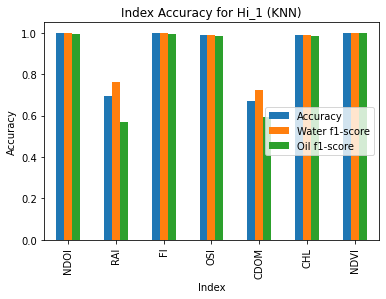

In [73]:
Hi_1[Hi_1.Model == "KNN"].plot.bar(x = "Index", y = ["Accuracy", "Water f1-score", "Oil f1-score"])
plt.ylabel("Accuracy")
plt.title("Index Accuracy for Hi_1 (KNN)")
plt.legend(loc='center right')

